In [35]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from models import UNET, SinusoidalEmbeddings, ResBlock
from diffusion.sampler import DDPM_Scheduler
from train import train
from einops import rearrange
from typing import List
import matplotlib.pyplot as plt
from timm.utils import ModelEmaV3
from inference import inference

In [36]:
def display_reverse(images: List):
    fig, axes = plt.subplots(1, 10, figsize=(10,1))
    for i, ax in enumerate(axes.flat):
        x = images[i].squeeze(0)
        x = rearrange(x, 'c h w -> h w c')
        x = x.numpy()
        ax.imshow(x)
        ax.axis('off')
    plt.show()

In [37]:
# def inference(checkpoint_path: str=None,
#               num_time_steps: int=1000,
#               ema_decay: float=0.9999, ):
#     checkpoint = torch.load(checkpoint_path)
#     model = UNET().cuda()
#     model.load_state_dict(checkpoint['weights'])
#     ema = ModelEmaV3(model, decay=ema_decay)
#     ema.load_state_dict(checkpoint['ema'])
#     scheduler = DDPM_Scheduler(num_time_steps=num_time_steps)
#     times = [0,15,50,100,200,300,400,550,700,999]
#     images = []

#     with torch.no_grad():
#         model = ema.module.eval()
#         for i in range(10):
#             z = torch.randn(1, 1, 32, 32)
#             for t in reversed(range(1, num_time_steps)):
#                 t = [t]
#                 temp = (scheduler.beta[t]/( (torch.sqrt(1-scheduler.alpha[t]))*(torch.sqrt(1-scheduler.beta[t])) ))
#                 z = (1/(torch.sqrt(1-scheduler.beta[t])))*z - (temp*model(z.cuda(),t).cpu())
#                 if t[0] in times:
#                     images.append(z)
#                 e = torch.randn(1, 1, 32, 32)
#                 z = z + (e*torch.sqrt(scheduler.beta[t]))
#             temp = scheduler.beta[0]/( (torch.sqrt(1-scheduler.alpha[0]))*(torch.sqrt(1-scheduler.beta[0])) )
#             x = (1/(torch.sqrt(1-scheduler.beta[0])))*z - (temp*model(z.cuda(),[0]).cpu())

#             images.append(x)
#             x = rearrange(x.squeeze(0), 'c h w -> h w c').detach()
#             x = x.numpy()
#             plt.imshow(x)
#             plt.show()
#             display_reverse(images)
#             images = []


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-56.461014..42.171303].


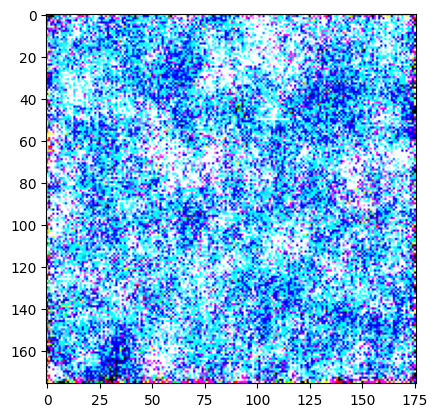

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.0624185..3.989436].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-16.028378..12.413428].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-28.316347..19.06465].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-43.94476..30.039825].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-53.70101..36.55687].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-61.01382..42.284782].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-61.993355..44.

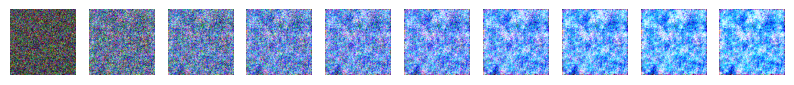

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-41.041924..39.859016].


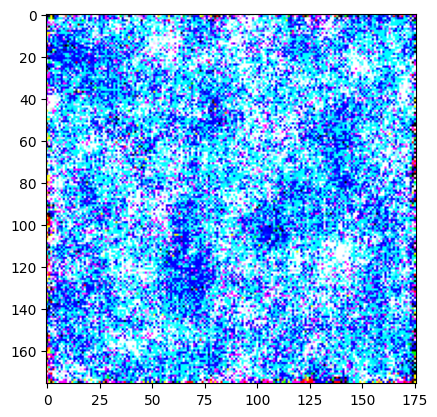

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.2026334..4.442316].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-15.915688..13.134815].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-23.44116..20.497057].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-34.82379..31.02332].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-40.628777..36.85144].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-45.436085..42.56298].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-45.111145..43.

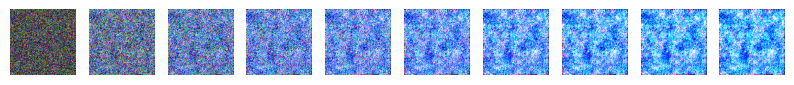

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-46.263462..56.172523].


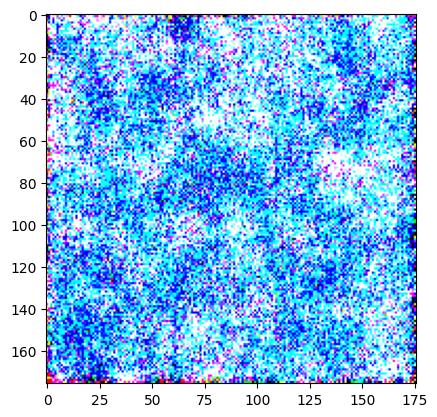

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.0835223..4.1774473].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-13.726803..14.550663].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-20.949663..25.59963].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-31.98131..40.7067].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-39.77165..50.90697].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-45.65927..57.980793].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-48.271015..59.6

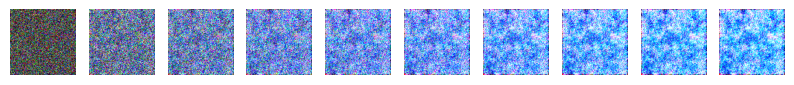

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-51.346565..43.855442].


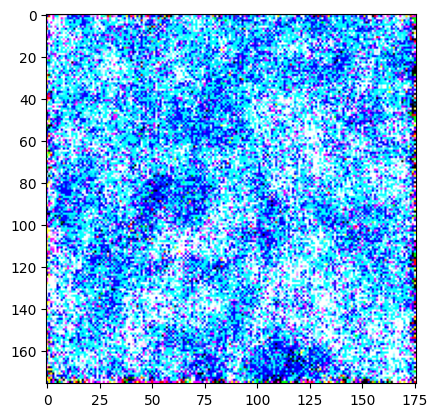

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.17867..4.1467066].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-13.699407..14.24661].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-25.215944..24.54256].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-39.190018..34.590195].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-47.552345..41.863956].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-53.307995..45.70418].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-55.34586..47.

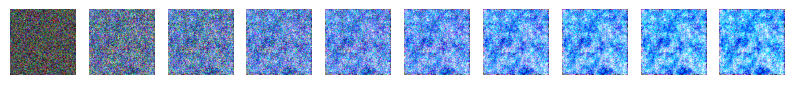

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-45.777245..51.994034].


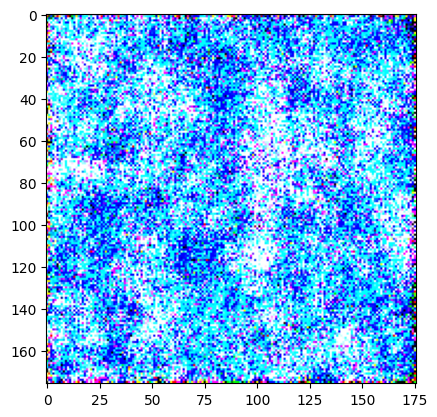

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.397604..4.162226].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-15.031222..16.614456].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-24.842424..29.883705].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-35.529198..42.538425].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-42.546043..51.883827].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-48.30048..57.155205].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.53243..5

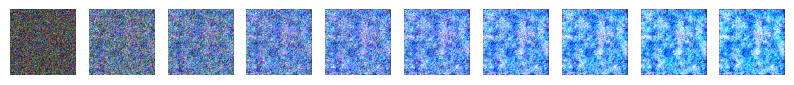

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-52.174873..46.952686].


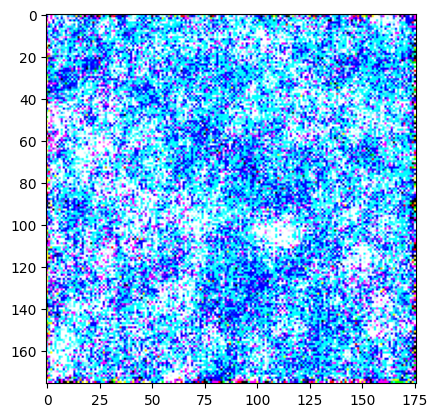

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.3813076..4.2405186].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-14.434003..14.669143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-26.57445..25.22742].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-39.94262..37.828617].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-48.15516..46.410236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-54.73482..50.623367].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-55.826424..51

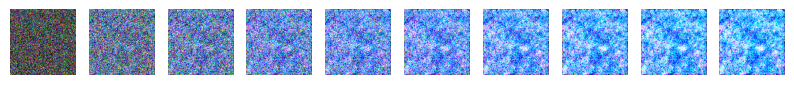

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-41.11021..54.50419].


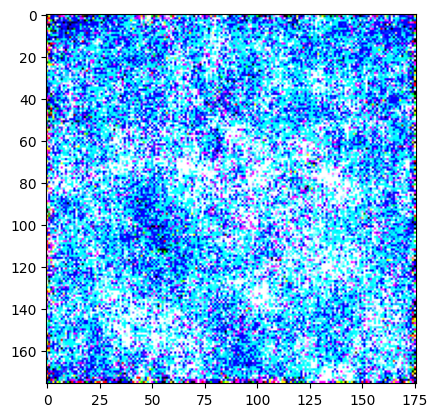

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.5725317..4.7473073].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-15.219123..11.199479].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-23.056807..21.893003].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-33.306297..37.122894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-40.751305..46.22631].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-44.767513..53.555218].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-44.77491.

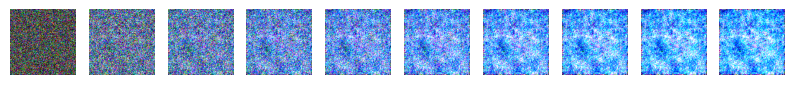

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-56.706516..35.845875].


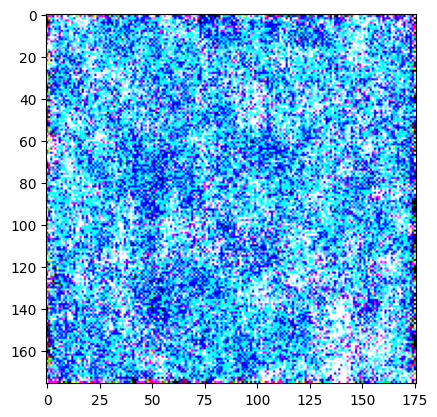

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.459008..3.8662648].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-16.237364..11.917015].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-29.837349..19.351036].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-44.136574..25.791279].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-53.29109..31.57243].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-60.145786..36.8304].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-61.077328..38

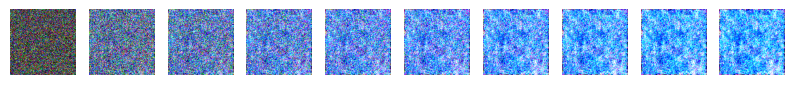

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-41.836174..56.186035].


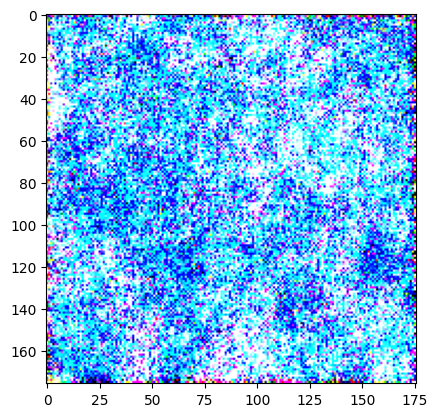

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.727408..4.2333765].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-12.1711645..17.719389].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-20.256708..29.690775].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-27.71529..44.47104].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-34.563637..53.8683].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-40.8055..59.25622].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-43.272865..60.9

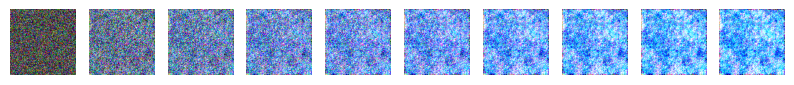

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-50.109493..43.51293].


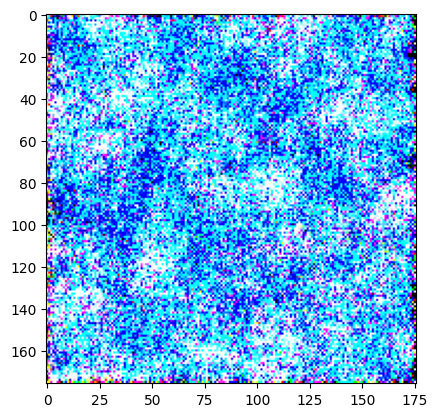

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.9205613..4.369845].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-14.711003..14.222245].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-25.066317..23.461353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-39.374302..35.523224].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-48.112553..42.77502].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-51.805714..46.380096].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-53.29222..

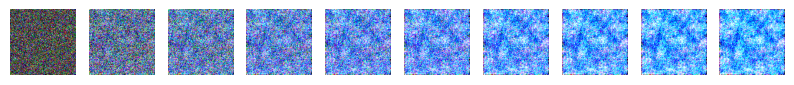

In [ ]:
inference(checkpoint_path='checkpoints/celeba_v1')

In [ ]:
S = input().strip()
K = int(input())

# Check if all characters are the same
all_same = True
first_char = S[0]
for c in S:
    if c != first_char:
        all_same = False
        break
if all_same:
    print((len(S) * K) // 2)
else:
    # Split into runs
    runs = []
    current_char = S[0]
    count = 1
    for c in S[1:]:
        if c == current_char:
            count += 1
        else:
            runs.append((current_char, count))
            current_char = c
            count = 1
    runs.append((current_char, count))
    
    base_changes = sum(cnt // 2 for char, cnt in runs)

In [11]:
def min_repaints(S: str, K: int) -> int:
    # 1) Build runs in one pass
    runs = []
    count = 1
    for i in range(1, len(S)):
        if S[i] == S[i-1]:
            count += 1
        else:
            runs.append(count)
            count = 1
    runs.append(count)
    
    # 2) If S is a single run, just floor(|S|*K/2)
    if len(runs) == 1:
        return (runs[0] * K) // 2
    
    # 3) Base changes per copy
    base = sum(r // 2 for r in runs)
    
    # 4) No merge if ends differ
    if S[0] != S[-1]:
        return base * K
    
    # 5) Otherwise handle boundary merges
    A, B = runs[0], runs[-1]
    extra = ((A + B) // 2) - (A // 2 + B // 2)
    return base * K + extra * (K - 1)

    # Check if all characters are the same
def find_runs(S: str, K: int) -> int:
    # import pdb; pdb.set_trace()
    all_same = True
    first_char = S[0]
    for c in S:
        if c != first_char:
            all_same = False
            break
    if all_same:
        print((len(S) * K) // 2)
    else:
        # Split into runs
        runs = []
        current_char = S[0]
        count = 1
        for c in S[1:]:
            if c == current_char:
                count += 1
            else:
                runs.append((current_char, count))
                current_char = c
                count = 1
        runs.append((current_char, count))
        
        base_changes = sum(cnt // 2 for char, cnt in runs)
    return 

In [12]:
find_runs('issii', 2)

In [23]:
def min_repaints(S: str, K: int) -> int:
    # 1) Build runs in one pass
    runs = []
    count = 1
    for i in range(1, len(S)):
        if S[i] == S[i-1]:
            count += 1
        else:
            runs.append(count)
            count = 1
    runs.append(count)
    
    # 2) If S is a single run, just floor(|S|*K/2)
    if len(runs) == 1:
        return (runs[0] * K) // 2
    
    # 3) Base changes per copy
    base = sum(r // 2 for r in runs)
    
    # 4) No merge if ends differ
    if S[0] != S[-1]:
        return base * K
    
    # 5) Otherwise handle boundary merges
    A, B = runs[0], runs[-1]
    extra = ((A + B) // 2) - (A // 2 + B // 2)
    return base * K + extra * (K - 1)


In [29]:
# S = input().strip()
# K = int(input())

print(min_repaints('issii', 2))
print(min_repaints('qq', 8))
print(min_repaints('Cooocoooonoteeeeeeeests', 99999333))


4
8
699995331


In [27]:
print(len('qq'*8))

16


In [ ]:
699995331